Analisis casos manuales

In [11]:
import os
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

username = os.getlogin()
hoy = datetime.datetime.now()
date_formatcarga = "%d.%m.%Y"
date_formatexport = "%d-%m-%Y"
date_formatcasos = "%d-%m-%Y H:M"

fecha_actual = hoy.strftime(date_formatcarga)
df1 = pd.DataFrame
file_path = f'C:\\Users\\{username}\\Documents\\Py\\CASOS\\tablacasos.xlsx'
df1 = pd.read_excel(file_path,
                    sheet_name='Historial casos Manuales',header=0,
                    names=['caso','agencia','tdep','contacto','asunto','cierre','montocierre','depositado','banco','user','fapertura','fmod','alias','usermod'])
df1['tdep'] = df1['tdep'].astype(str)
df1.fillna('null', inplace=True)

print("Tabla cargada.")

C:\Users\dxs81864\AppData\Roaming\Python\Python312\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Tabla cargada.


C:\Users\dxs81864\AppData\Local\Temp\ipykernel_23768\3813982641.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1.fillna('null', inplace=True)


In [16]:
date_formatexport = "%d-%m-%Y"
date_formatcasos = "%d-%m-%Y H:M"
df1['fapertura'] = pd.to_datetime(df1['fapertura'],format = date_formatcasos)
df1['fmod'] = pd.to_datetime(df1['fmod'],format = date_formatexport)

Obtener la cantidad de casos cerrados

In [17]:
count_df1 = df1[df1['usermod'].str.contains('ioliv')].groupby('usermod').size().reset_index(name='count')
count_df2 = df1[df1['usermod'].str.contains('procom')].groupby('usermod').size().reset_index(name='count')
count_df3 = df1[df1['usermod'].str.contains('sysadmin')].groupby('usermod').size().reset_index(name='count')
count_df = pd.concat([count_df1,count_df2,count_df3])
sorted_df2 = count_df2
print(count_df)
print(f"Total casos operador: {(sum(count_df['count']))}")                                                            

  usermod  count
0   ioliv   9097
0  procom   2570
Total casos operador: 11667


Obtener cantidad de casos creados por usuario

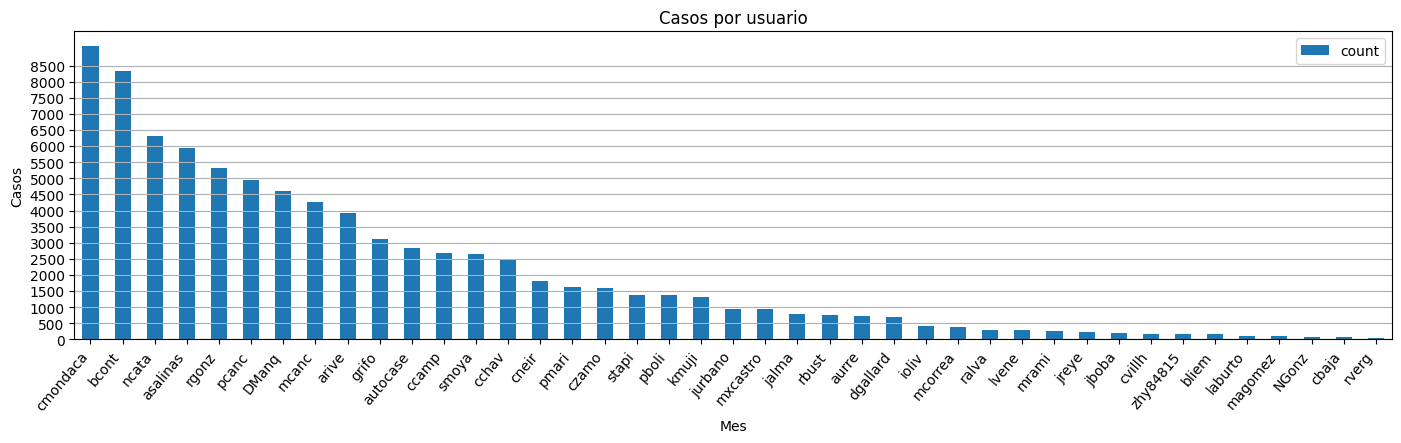

In [18]:
count_cpu= df1.groupby('user').size().reset_index(name='count').sort_values(by='count', ascending=False)
count_cpu = count_cpu.set_index('user')
count_cpu = count_cpu[count_cpu['count'] > 50]
count_cpu.plot.bar(title='Casos por usuario',xlabel='Mes',ylabel='Casos',figsize=(17,4))
#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p:f'{int(x/1000000):,}'))
plt.xticks(rotation=50, ha='right')
plt.grid(axis='y')
plt.yticks(np.arange(0,9000,step=500))
plt.show()

In [19]:
dfc = df1.copy()
count_df = dfc.loc[dfc['fapertura'] > '2024-01-01']
count_df = count_df[count_df['tdep'].str.contains('Parcializado')].groupby('tdep').size().reset_index(name='count')
sorted_df = count_df.sort_values(by='count', ascending=False)
print (sorted_df)
#sorted_df.to_csv('C:\\Users\\dxs81864\\Documents\\Py\\CASOS\\GENERADOS\\Pdc ' + fecha_actual + '.csv',
#               sep=';',
#               header=False,
#               index=False)
print(f"Total casos: {(sum(count_df['count']))}")  
                                  

                         tdep  count
0                Parcializado   8293
1  Parcializado no autorizado     30
Total casos: 8323


Obtener la ocurrencia de tipo de caso

Reemplazar tipo de caso y periodicidad

In [35]:
tipocaso = 'Parcializado'
fechadesde = '2022-01-01'
periodicidad = 'M'
periodicity = df1[df1['tdep'].str.contains(tipocaso)]
periodicity = periodicity.loc[periodicity['fapertura'] > fechadesde]
periodicity = periodicity.groupby(df1['fapertura'].dt.to_period(periodicidad))['tdep'].count()
count = periodicity.resample(periodicidad).sum()
#print(count)
print(count.mean())

589.7297297297297


C:\Users\dxs81864\AppData\Local\Temp\ipykernel_23768\3675140032.py:7: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  count = periodicity.resample(periodicidad).sum()


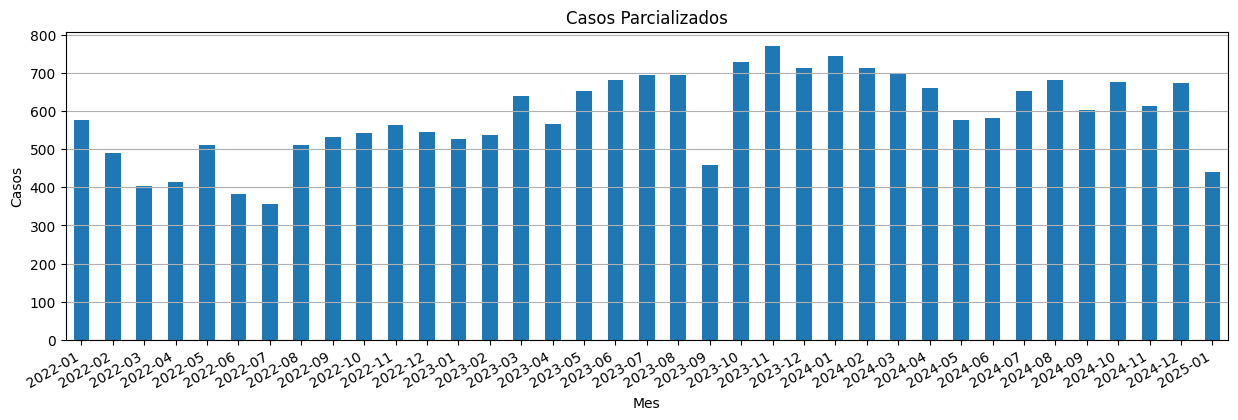

In [36]:
count.plot.bar(title='Casos Parcializados',xlabel='Mes',ylabel='Casos',figsize=(15,4))
#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p:f'{int(x/1000000):,}'))
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y')
#plt.yticks(np.arange(-40000000,170000000,step=10000000))
plt.show()

Casos por alias

In [32]:
dfalias = df1[df1['user'].str.contains('autocase')]

Obtener ocurrencia por agencia de casos parcializados por agencia agrupado según mes

In [38]:
df_parc = df1.loc[df1['fapertura'] > '2022-01-01']
df_parc = df_parc[df_parc['tdep'].str.contains('Parcializado')]
df_conteoparc = df_parc.groupby([pd.Grouper(key='agencia')]).size().reset_index(name='periodicity')
df_conteoparc = df_conteoparc.sort_values(by=['periodicity','agencia'], ascending=[False,False])
#df_conteoparc.drop_duplicates(subset='agencia',keep='first', inplace=True)
print(df_conteoparc)


       agencia  periodicity
784   20042310          792
530   19052570          766
789   20042500          705
107   16062130          572
1121  21092190          496
...        ...          ...
8          104            1
4      1001012            1
3     10003008            1
2     10001008            1
1     10001002            1

[2358 rows x 2 columns]


Agencias Parcializados

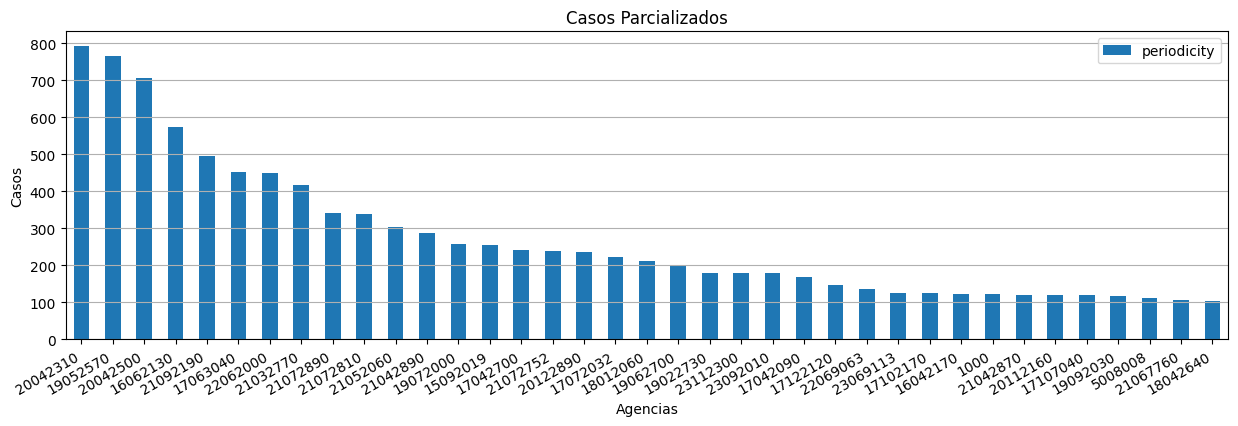

In [41]:
df_conteoparcmuestra = df_conteoparc[df_conteoparc['periodicity'] > 100].set_index('agencia')
df_conteoparcmuestra.plot.bar(title='Casos Parcializados',xlabel='Agencias',ylabel='Casos',figsize=(15,4))
#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p:f'{int(x/1000000):,}'))
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y')
#plt.yticks(np.arange(-40000000,170000000,step=10000000))
plt.show()

In [42]:
df_conteoparctotal = df_conteoparc.groupby('agencia')['periodicity'].sum().reset_index()
df_conteoparctotal = df_conteoparctotal.sort_values(by='periodicity', ascending=False)

Tabla de casos pre-conciliados

In [59]:
dfpc = df1.copy()
#dfpc= dfpc[dfpc['fapertura'] <= '2025-01-01']
#dfpc= dfpc[dfpc['fapertura'] >= '2024-01-12']
#dfpc = dfpc[dfpc['tdep'].str.contains('Parcializado')]

dfpc = dfpc[~dfpc['asunto'].str.contains('B2B')]

#dfc = dfc[~dfc['tdep'].str.contains('Problema cartola')|dfc['tdep'].str.contains('Plan de contingencia')] 
#dfc = dfc[~dfpc['caso'].isin(dfc['caso'])]
df_period = dfpc[dfpc['usermod'].str.contains('procom') | dfpc['usermod'].str.contains('Sysadmin')]

conteo_preconc = df_period.groupby(dfpc['fapertura'].dt.to_period('M'))['caso'].count()
conteo_parc = dfc[dfc['tdep'].str.contains('Parcializado')].groupby(dfc['fapertura'].dt.to_period('M'))['caso'].count()
conteo_pc = dfc[dfc['tdep'].str.contains('Problema cartola')].groupby(dfc['fapertura'].dt.to_period('M'))['caso'].count()

dfpreconc_plot = conteo_preconc.copy().resample('M').sum()
dfparc_plot = conteo_parc.copy().resample('M').sum()
dfpc_plot = conteo_pc.copy().resample('M').sum()

C:\Users\dxs81864\AppData\Local\Temp\ipykernel_23768\1650960264.py:16: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  dfpreconc_plot = conteo_preconc.copy().resample('M').sum()
C:\Users\dxs81864\AppData\Local\Temp\ipykernel_23768\1650960264.py:17: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  dfparc_plot = conteo_parc.copy().resample('M').sum()
C:\Users\dxs81864\AppData\Local\Temp\ipykernel_23768\1650960264.py:18: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  dfpc_plot = conteo_pc.copy().resample('M').sum()


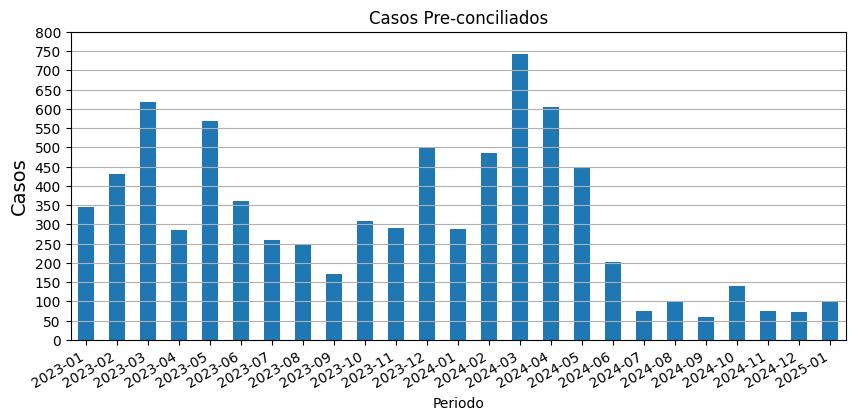

In [60]:
dfpreconc_plot.plot(kind='bar',x='count', figsize=(10,4))
plt.title('Casos Pre-conciliados')
plt.xlabel('Periodo')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Casos', fontsize = 14)
plt.yticks(np.arange(0,850,step=50))
plt.grid(axis='y')
arrcasos = dfparc_plot.to_numpy()
#for i, v in enumerate(y):
#    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))
#myFmt = mdates.DateFormatter('%b/%Y')
#plt.gca().xaxis.set_major_formatter(myFmt)
#plt.xticks(np.arange('2023-12', '2024-12', dtype='datetime64[M]'),rotation=10, ha='right')
plt.show()

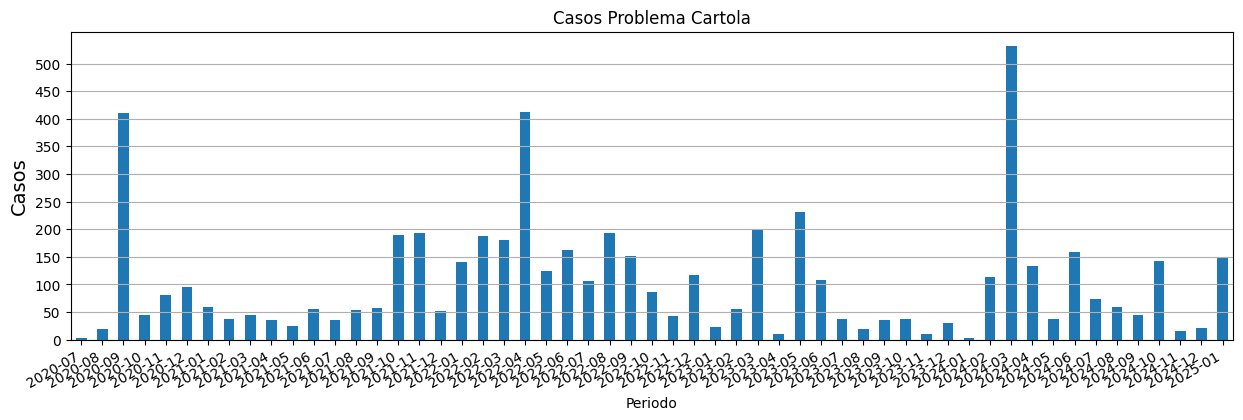

In [62]:
dfpc_plot.plot(kind='bar',x='count', figsize=(15,4))
plt.title('Casos Problema Cartola')
plt.xlabel('Periodo')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Casos', fontsize = 14)
plt.yticks(np.arange(0,550,step=50))
plt.grid(axis='y')
arrcasos = dfpc_plot.to_numpy()

In [ ]:
tipos_tdep = df1['tdep'].unique()
tipos_user = df1['user'].unique()
tipos_user = df1['user'].unique()
tipos_agencia = df1['agencia'].unique()

In [ ]:
print(tipos_tdep)

In [ ]:
print(tipos_user)

In [ ]:
print(tipos_user)